In [1]:
import pandas as pd

df = pd.read_csv('삼성전자_주가.csv', encoding='euc-kr')
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2023-07-31,69800,-800,-1.13,70900,71000,69800,13035420,9.149940e+11,4.166910e+14,5969782550
1,2023-07-28,70600,-1100,-1.53,71800,72400,70100,19420683,1.374120e+12,4.214670e+14,5969782550
2,2023-07-27,71700,1900,2.72,69900,71700,69300,24261179,1.716360e+12,4.280330e+14,5969782550
3,2023-07-26,69800,-200,-0.29,69800,70600,68100,30016221,2.074080e+12,4.166910e+14,5969782550
4,2023-07-25,70000,-400,-0.57,70000,70500,69800,14314945,1.002550e+12,4.178850e+14,5969782550
...,...,...,...,...,...,...,...,...,...,...,...
490,2021-08-04,82900,1500,1.84,82200,83100,81800,25642368,2.117640e+12,4.948950e+14,5969782550
491,2021-08-03,81400,2100,2.65,79400,81400,79300,24339360,1.966480e+12,4.859400e+14,5969782550
492,2021-08-02,79300,800,1.02,79200,79500,78700,11739124,9.291540e+11,4.734040e+14,5969782550
493,2021-07-30,78500,-500,-0.63,78900,78900,78500,13823411,1.086490e+12,4.686280e+14,5969782550


In [2]:
df = df.drop(['대비', '등락률', '시가총액', '상장주식수'], axis=1)
df

,일자,종가,시가,고가,저가,거래량,거래대금
0,2023-07-31,69800,70900,71000,69800,13035420,9.149940e+11
1,2023-07-28,70600,71800,72400,70100,19420683,1.374120e+12
2,2023-07-27,71700,69900,71700,69300,24261179,1.716360e+12
3,2023-07-26,69800,69800,70600,68100,30016221,2.074080e+12
4,2023-07-25,70000,70000,70500,69800,14314945,1.002550e+12
...,...,...,...,...,...,...,...
490,2021-08-04,82900,82200,83100,81800,25642368,2.117640e+12
491,2021-08-03,81400,79400,81400,79300,24339360,1.966480e+12
492,2021-08-02,79300,79200,79500,78700,11739124,9.291540e+11
493,2021-07-30,78500,78900,78900,78500,13823411,1.086490e+12


In [3]:
df['일자'] = pd.to_datetime(df['일자'])
df = df.set_index('일자')
df = df.sort_index()
df

,종가,시가,고가,저가,거래량,거래대금
일자,,,,,,
2021-07-29,79000,78800,79400,78800,14360453,1.134760e+12
2021-07-30,78500,78900,78900,78500,13823411,1.086490e+12
2021-08-02,79300,79200,79500,78700,11739124,9.291540e+11
2021-08-03,81400,79400,81400,79300,24339360,1.966480e+12
2021-08-04,82900,82200,83100,81800,25642368,2.117640e+12
...,...,...,...,...,...,...
2023-07-25,70000,70000,70500,69800,14314945,1.002550e+12
2023-07-26,69800,69800,70600,68100,30016221,2.074080e+12
2023-07-27,71700,69900,71700,69300,24261179,1.716360e+12


In [4]:
df = df.resample('1D').mean()
df

,종가,시가,고가,저가,거래량,거래대금
일자,,,,,,
2021-07-29,79000.0,78800.0,79400.0,78800.0,14360453.0,1.134760e+12
2021-07-30,78500.0,78900.0,78900.0,78500.0,13823411.0,1.086490e+12
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-01,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-02,79300.0,79200.0,79500.0,78700.0,11739124.0,9.291540e+11
...,...,...,...,...,...,...
2023-07-27,71700.0,69900.0,71700.0,69300.0,24261179.0,1.716360e+12
2023-07-28,70600.0,71800.0,72400.0,70100.0,19420683.0,1.374120e+12
2023-07-29,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.interpolate(method='linear')
df

,종가,시가,고가,저가,거래량,거래대금
일자,,,,,,
2021-07-29,79000.000000,78800.0,79400.000000,78800.000000,1.436045e+07,1.134760e+12
2021-07-30,78500.000000,78900.0,78900.000000,78500.000000,1.382341e+07,1.086490e+12
2021-07-31,78766.666667,79000.0,79100.000000,78566.666667,1.312865e+07,1.034045e+12
2021-08-01,79033.333333,79100.0,79300.000000,78633.333333,1.243389e+07,9.815993e+11
2021-08-02,79300.000000,79200.0,79500.000000,78700.000000,1.173912e+07,9.291540e+11
...,...,...,...,...,...,...
2023-07-27,71700.000000,69900.0,71700.000000,69300.000000,2.426118e+07,1.716360e+12
2023-07-28,70600.000000,71800.0,72400.000000,70100.000000,1.942068e+07,1.374120e+12
2023-07-29,70333.333333,71500.0,71933.333333,70000.000000,1.729226e+07,1.221078e+12


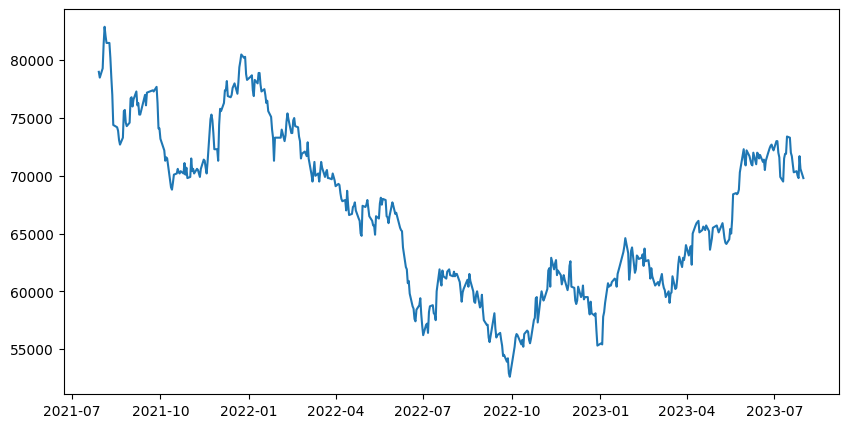

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['종가'])
plt.show()

In [7]:
import numpy as np

def timeseries_reframed(data, N_input=1, N_output=1, stride=1):
    data = data.values.T
    X = np.array([np.roll(data, -i)[:, :data.shape[1]-N_input-N_output+1] for i in range(N_input)])
    X = np.transpose(X, axes=[2,0,1])[::stride]
    
    y = np.array([np.roll(data, -i)[:, N_input:data.shape[1]-N_output+1] for i in range(N_output)])
    y = np.transpose(y, axes=[2,0,1])[::stride]
    return X, y

In [8]:
N_input = 50
N_output = 10
stride = 1

In [9]:
X, y = timeseries_reframed(df, N_input=N_input, N_output=N_output, stride=stride)
X.shape, y.shape

((674, 50, 6), (674, 10, 6))

In [27]:
df.iloc[1]

종가      7.850000e+04
시가      7.890000e+04
고가      7.890000e+04
저가      7.850000e+04
거래량     1.382341e+07
거래대금    1.086490e+12
Name: 2021-07-30 00:00:00, dtype: float64

In [24]:
df.values[0]

array([7.9000000e+04, 7.8800000e+04, 7.9400000e+04, 7.8800000e+04,
       1.4360453e+07, 1.1347600e+12])

In [28]:
X[1][0]

array([7.8500000e+04, 7.8900000e+04, 7.8900000e+04, 7.8500000e+04,
       1.3823411e+07, 1.0864900e+12])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y[:,:,0], test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((431, 50, 6), (108, 50, 6), (135, 50, 6), (431, 10), (108, 10), (135, 10))

In [11]:
import tensorflow as tf

X_tr = np.reshape(tf.cast(X_train, tf.float32), (-1, X_train.shape[2])) 
X_va = np.reshape(tf.cast(X_val, tf.float32), (-1, X_train.shape[2]))
X_te = np.reshape(tf.cast(X_test, tf.float32), (-1, X_train.shape[2])) 

X_tr.shape, X_va.shape, X_te.shape

((21550, 6), (5400, 6), (6750, 6))

In [12]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_tr)
X_val_scaled = X_scaler.transform(X_va)
X_test_scaled = X_scaler.transform(X_te)

y_train_scaled = y_scaler.fit_transform(y_train)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
X_tr = np.reshape(X_train_scaled, (-1, X_train.shape[1], X_train.shape[2])) 
X_va = np.reshape(X_val_scaled, (-1, X_train.shape[1], X_train.shape[2])) 
X_te = np.reshape(X_test_scaled, (-1, X_train.shape[1], X_train.shape[2]))

y_tr = y_train_scaled
y_va = y_val_scaled
y_te = y_test_scaled

X_tr.shape, X_va.shape, X_te.shape, y_tr.shape, y_va.shape, y_te.shape

((431, 50, 6), (108, 50, 6), (135, 50, 6), (431, 10), (108, 10), (135, 10))

In [14]:
import tensorflow_addons as tfa

inputs = tf.keras.layers.Input((N_input, X_train.shape[2]))
x = inputs

x = tf.keras.layers.Conv1D(64, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Conv1D(128, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Conv1D(256, kernel_size=11, strides=1, padding='same', activation='gelu')(x)
x = tfa.layers.GroupNormalization()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(128, activation='gelu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(N_output, activation='linear')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=x)

model.summary()


c:\Users\PC\Bcode\tensor\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\PC\Bcode\tensor\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 6)]           0         
                                                                 
 conv1d (Conv1D)             (None, 50, 64)            4288      
                                                                 
 group_normalization (GroupN  (None, 50, 64)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 50, 128)           90240     
                                                                 
 group_normalization_1 (Grou  (None, 50, 128)          256       
 pNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 50, 256)           360704

In [19]:
patience = 300
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, 
                                              mode='min', restore_best_weights=True)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(X_tr, y_tr, validation_data=[X_va, y_va], epochs=2000, batch_size=4,
                    callbacks = [early_stop])

Epoch 1/2000
108/108 [==============================] - 2s 8ms/step - loss: 0.2834 - val_loss: 0.0833
Epoch 2/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3086 - val_loss: 0.0860
Epoch 3/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3530 - val_loss: 0.1069
Epoch 4/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3476 - val_loss: 0.0757
Epoch 5/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3280 - val_loss: 0.0797
Epoch 6/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3267 - val_loss: 0.0700
Epoch 7/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.2979 - val_loss: 0.0892
Epoch 8/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3098 - val_loss: 0.1149
Epoch 9/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.3077 - val_loss: 0.1269
Epoch 10/2000
108/108 [==============================] - 1s 5ms/step - loss: 0.354

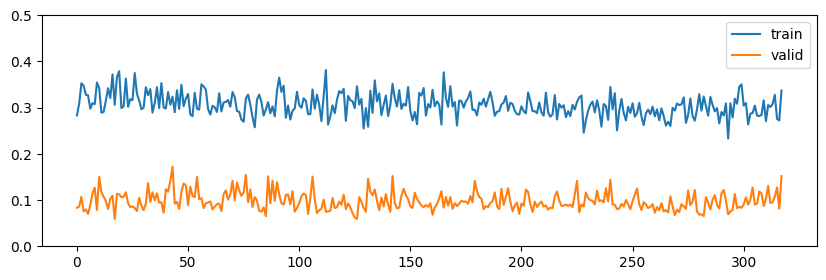

In [20]:
plt.figure(figsize=(10,3))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.ylim(0, 0.5)
plt.show()

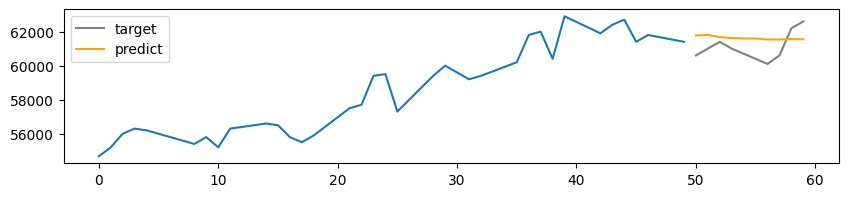

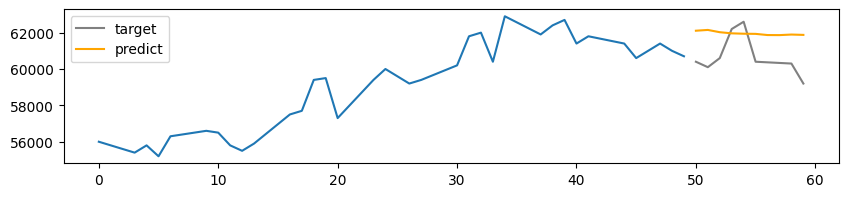

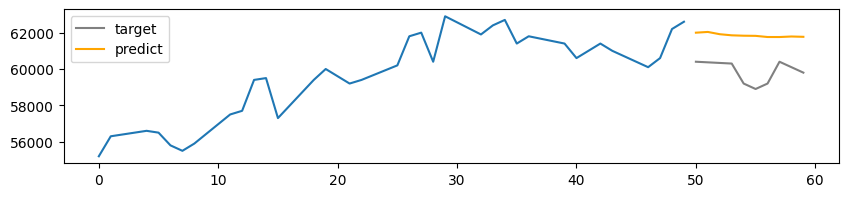

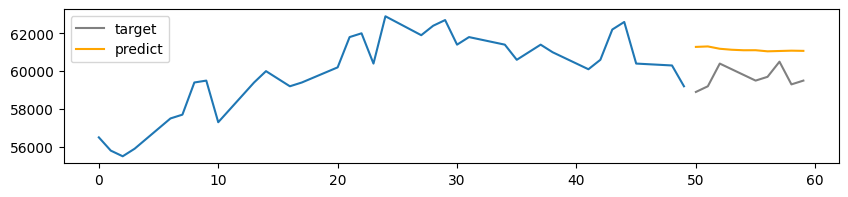

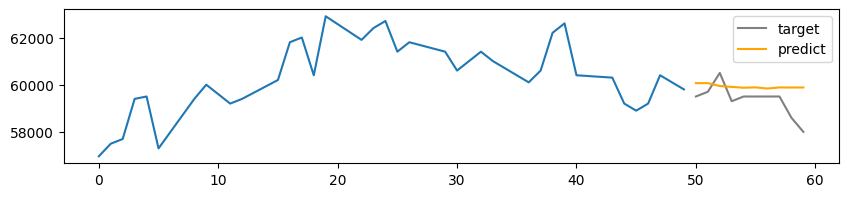

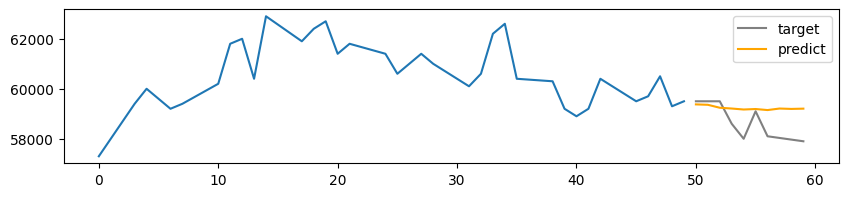

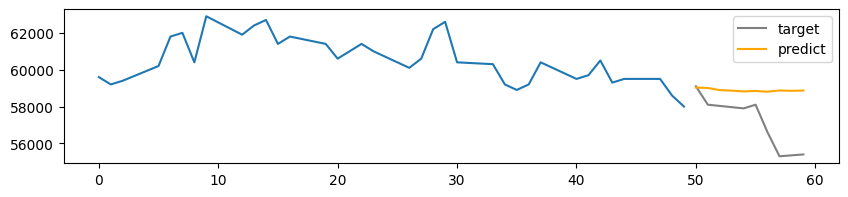

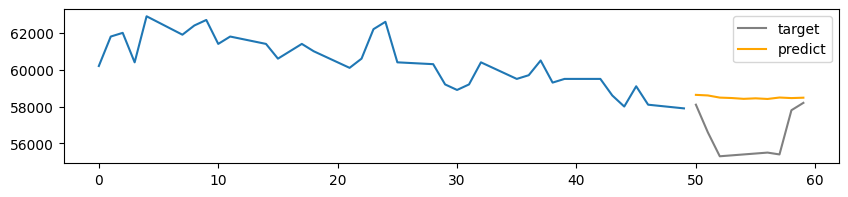

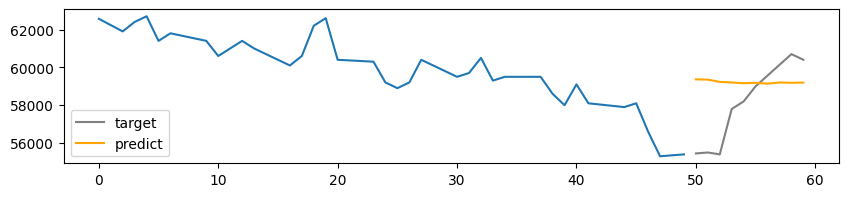

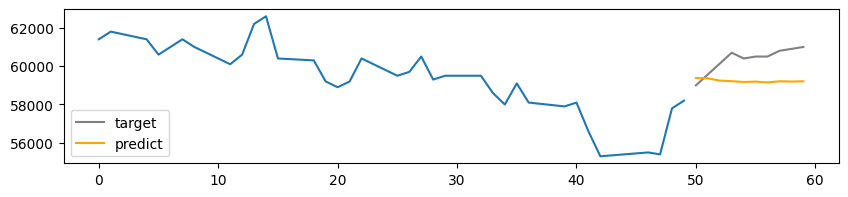

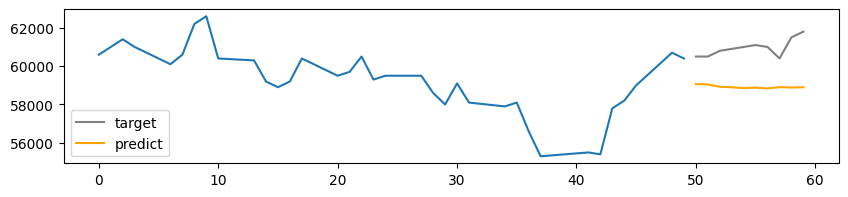

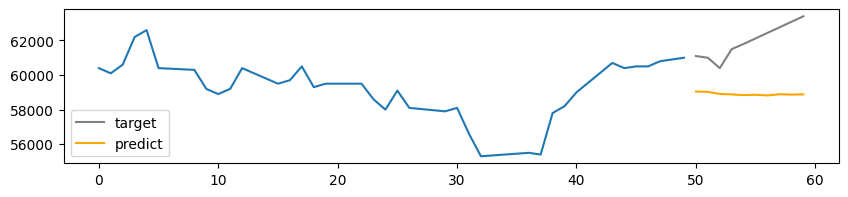

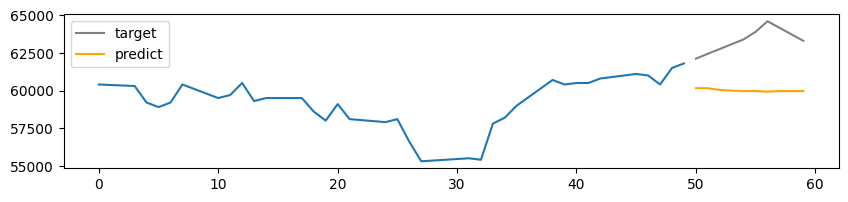

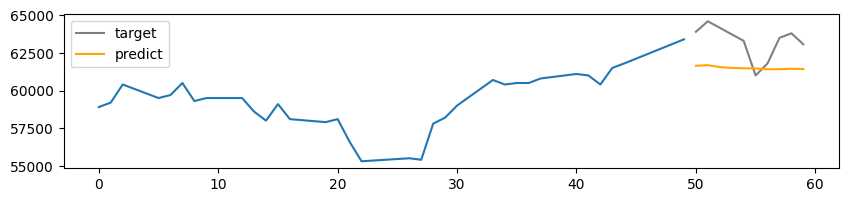

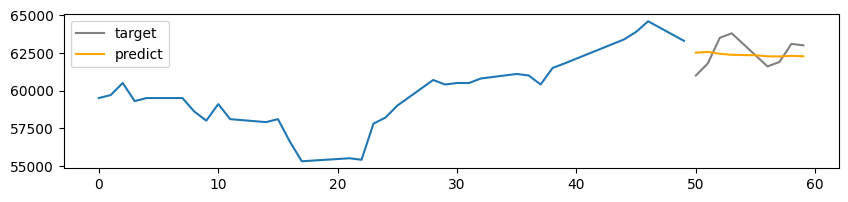

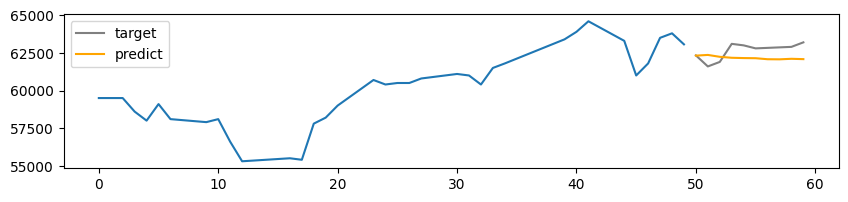

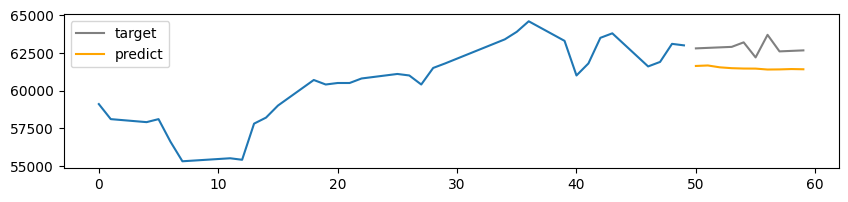

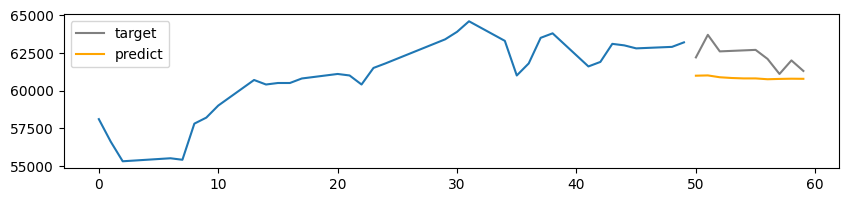

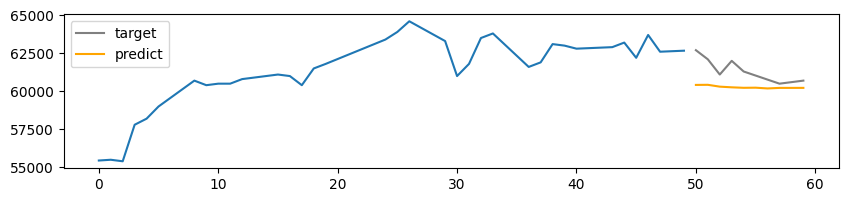

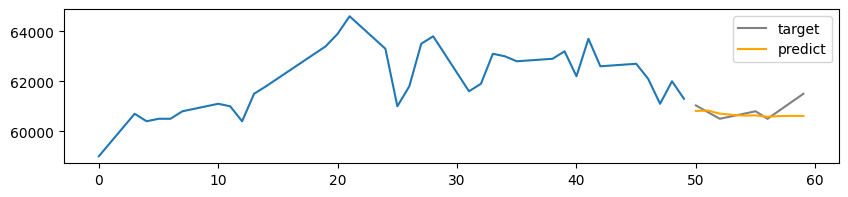

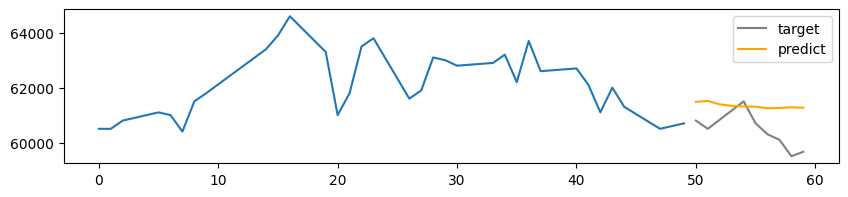

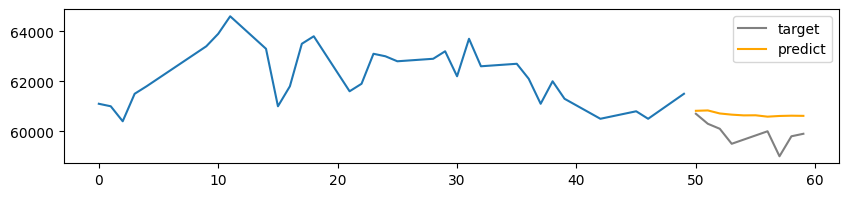

In [21]:
pred_va = model(X_va)
pred_va = y_scaler.inverse_transform(pred_va)

for idx in range(0, X_val.shape[0], 5):
    plt.figure(figsize=(10,2))
    plt.plot(np.arange(N_input), X_val[idx, :, 0])
    plt.plot(np.arange(N_input, N_input+N_output), y_val[idx, :], color='gray', label='target')
    plt.plot(np.arange(N_input, N_input+N_output), pred_va[idx, :], color='orange', label='predict')
    plt.legend()
    plt.show()